# Limpieza de Datos y Análisis Exploratorio de Datos

#### **Librerías**

Importamos las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
import calendar


#### **Lectura del dataset**

Leemos los datos.

In [2]:
df = pd.read_csv('delitos_2021.csv', sep=';')

Mostramos las cinco primeras filas del dataframe.

In [3]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,06/01/2021,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,"-34,62761","-58,379146",1.0
1,HC-2021-1009094,2021,Enero,Jueves,07/01/2021,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,"-34,64972969","-58,51058958",1.0
2,HC-2021-1013236,2021,Enero,Domingo,10/01/2021,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,"-34,62917196","-58,43058079",1.0
3,HC-2021-1014154,2021,Enero,Lunes,11/01/2021,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,"-34,63867577","-58,4145554",1.0
4,HC-2021-1015476,2021,Enero,Lunes,11/01/2021,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,"-34,64771436","-58,46806552",1.0


#### **Análisis del Dataset**

Consultamos el tamaño del dataset.

In [4]:
df.shape

(88567, 14)

Descripción del Dataset

In [5]:
df.describe()

,anio,comuna,cantidad
count,88567.0,87907.000000,7299.000000
mean,2021.0,7.538899,1.158515
std,0.0,4.554293,0.557664
min,2021.0,0.000000,1.000000
25%,2021.0,4.000000,1.000000
50%,2021.0,7.000000,1.000000
75%,2021.0,12.000000,1.000000
max,2021.0,15.000000,10.000000


#### **Tipos de Datos**

Tipos de datos de las columnas.

In [6]:
df.dtypes

id-mapa       object
anio           int64
mes           object
dia           object
fecha         object
franja        object
tipo          object
subtipo       object
uso_armas     object
barrio        object
comuna       float64
latitud       object
longitud      object
cantidad     float64
dtype: object

Vemos que la columna fecha tiene como tipo de dato object, cambiamos el tipo de dato a datatime.

In [7]:

df['fecha'] = df['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

/var/folders/xj/j8r00dd95wn7lh34b83jtgg80000gp/T/ipykernel_43360/1961818311.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['fecha'] = df['fecha'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))


#### **Valores Nulos y transformación de datos**

Vamos a analizar los datos de cada columna para ver si tienen datos nulos fáciles de encontrar o datos nulos que no se pueden econtrar con isnull, y vamos a inspeccionar los datos para normalizarlos, por ejemplo si en la columna dia hay dos lunes, uno con mayúsculas y otro sin mayúsculas, nos quedarmos con un sólo formato. 

In [8]:
df.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      72246
uso_armas    80095
barrio        1177
comuna         660
latitud          0
longitud         0
cantidad     81268
dtype: int64

Podemos ver que las columnas subtipo, uso_armas, barrio y comuna tienen valoes nulos.

##### **Columna barrio**

Analizamos los valores nulos de la columna barrio y comuna.

In [9]:
df[df.barrio.isnull()].comuna.value_counts()

comuna
0.0    517
Name: count, dtype: int64

In [10]:
df[df.barrio.isnull()].comuna.isnull().sum()

660

Podemos observar que todas las filas vacías de la columna barrio tienen la columna comuna vacía o con 0.  Es decir en las 1177 filas de barrios nulas, no hay el dato correspondiente a comuna. 
Ahora analizamos las columnas latitud y longitud de las mismas filas.

In [11]:
df[df.barrio.isnull()].latitud.value_counts()

latitud
SD    1177
Name: count, dtype: int64

In [12]:
df[df.barrio.isnull()].longitud.value_counts()

longitud
SD    1177
Name: count, dtype: int64

Como vemos tampoco tienen los datos de longitud y latitud, por lo tanto deberíamos borrar estas filas.

In [13]:
df.dropna(subset=['barrio'], inplace = True)

In [14]:
df.barrio.isnull().sum()

0

In [15]:
df.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      71631
uso_armas    78992
barrio           0
comuna           0
latitud          0
longitud         0
cantidad     80609
dtype: int64

In [16]:
df.barrio.value_counts()

barrio
Palermo              7785
Balvanera            5952
Flores               4842
Recoleta             4397
Caballito            4046
Almagro              3590
Villa Lugano         3295
Belgrano             3030
Barracas             2864
Constitución         2577
Villa Crespo         2396
Mataderos            2255
Nueva Pompeya        2186
San Nicolás          2133
Villa Soldati        1982
Parque Chacabuco     1925
Retiro               1902
Villa Urquiza        1877
Monserrat            1655
San Cristóbal        1627
Saavedra             1626
Parque Avellaneda    1530
Villa Devoto         1472
Parque Patricios     1461
Boedo                1429
Nuñez                1424
Liniers              1418
Boca                 1284
Colegiales           1216
Chacarita            1190
Floresta             1149
Villa Del Parque      972
San Telmo             951
Villa Pueyrredón      806
Vélez Sársfield       802
Monte Castro          793
Villa Santa Rita      745
Villa Luro            733
Villa

##### **Columna anio**

In [17]:
df.anio.value_counts()

anio
2021    87390
Name: count, dtype: int64

##### **Columna mes**

In [18]:
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')  # Para sistemas Unix/Linux
# locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')  # Para Windows

meses = list(calendar.month_name)[1:]
meses = list(map(str.capitalize, meses))

In [19]:
df.mes.value_counts().loc[meses]

mes
Enero         7170
Febrero       6803
Marzo         7883
Abril         6476
Mayo          5807
Junio         6651
Julio         7260
Agosto        7546
Septiembre    7220
Octubre       7628
Noviembre     8425
Diciembre     8521
Name: count, dtype: int64

##### **Columna dia**

In [20]:
df.dia.value_counts()

dia
Viernes      13598
Miércoles    13243
Martes       13229
Jueves       13161
Lunes        13090
Sábado       11276
Domingo       9695
domingo         21
jueves          16
martes          16
lunes           15
sábado          12
miércoles       10
viernes          8
Name: count, dtype: int64

In [21]:
dias = list(calendar.day_name)  
print(dias)

['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']


In [22]:
dias_cap = list(map(str.capitalize, dias))
dias_cap

['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [23]:
df.dia.replace(dias,dias_cap, inplace=True)

/var/folders/xj/j8r00dd95wn7lh34b83jtgg80000gp/T/ipykernel_43360/977842894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.dia.replace(dias,dias_cap, inplace=True)


In [24]:
df.dia.value_counts().loc[dias_cap]

dia
Lunes        13105
Martes       13245
Miércoles    13253
Jueves       13177
Viernes      13606
Sábado       11288
Domingo       9716
Name: count, dtype: int64

##### **Columna franja**

In [25]:
df.franja.value_counts()

franja
19    5151
18    5080
12    4845
20    4792
17    4773
8     4752
16    4447
10    4437
14    4381
13    4278
9     4277
15    4239
11    4064
7     3921
21    3790
22    3218
23    3001
6     2637
0     2634
5     1744
1     1606
SD    1488
2     1378
3     1246
4     1210
sd       1
Name: count, dtype: int64

In [26]:
df = df[~df.franja.isin(['sd', 'SD'])]

In [27]:
df.franja.value_counts()

franja
19    5151
18    5080
12    4845
20    4792
17    4773
8     4752
16    4447
10    4437
14    4381
13    4278
9     4277
15    4239
11    4064
7     3921
21    3790
22    3218
23    3001
6     2637
0     2634
5     1744
1     1606
2     1378
3     1246
4     1210
Name: count, dtype: int64

In [28]:
df['franja'] = df['franja'].astype(int)

In [29]:
df.dtypes

id-mapa                   object
anio                       int64
mes                       object
dia                       object
fecha        datetime64[ns, UTC]
franja                     int64
tipo                      object
subtipo                   object
uso_armas                 object
barrio                    object
comuna                   float64
latitud                   object
longitud                  object
cantidad                 float64
dtype: object

In [30]:
df.franja.value_counts().sort_index()

franja
0     2634
1     1606
2     1378
3     1246
4     1210
5     1744
6     2637
7     3921
8     4752
9     4277
10    4437
11    4064
12    4845
13    4278
14    4381
15    4239
16    4447
17    4773
18    5080
19    5151
20    4792
21    3790
22    3218
23    3001
Name: count, dtype: int64

##### **Columna tipo**

In [31]:
df.tipo.value_counts()

tipo
Robo (con violencia)     43794
Hurto (sin violencia)    35326
Lesiones                  6589
Homicidio                  192
Name: count, dtype: int64

##### **Columna subtipo**

In [32]:
df.subtipo.value_counts()

subtipo
Siniestro Vial     6683
Con uso de moto    4532
Hurto Automotor    3619
Robo Automotor      720
Doloso               84
Femicidio            14
Name: count, dtype: int64

##### **Columna uso_armas**

In [33]:
df.uso_armas.value_counts()

uso_armas
Arma de fuego    5872
Arma cortante    2461
Name: count, dtype: int64

In [34]:
df.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      70249
uso_armas    77568
barrio           0
comuna           0
latitud          0
longitud         0
cantidad     79120
dtype: int64

##### **Columna comuna**

In [35]:
df['comuna'] = df.comuna.astype(int)

In [36]:
df.comuna.value_counts().sort_index()

comuna
1     9266
2     4313
3     7438
4     7711
5     4929
6     3956
7     6659
8     5643
9     5155
10    4144
11    3869
12    4611
13    5544
14    7639
15    5024
Name: count, dtype: int64

In [37]:
df.dtypes

id-mapa                   object
anio                       int64
mes                       object
dia                       object
fecha        datetime64[ns, UTC]
franja                     int64
tipo                      object
subtipo                   object
uso_armas                 object
barrio                    object
comuna                     int64
latitud                   object
longitud                  object
cantidad                 float64
dtype: object

##### **Columnas latitud y longitud**

In [38]:
df['longitud'] = df['longitud'].str.replace(',', '.').astype(float)
df['latitud'] = df['latitud'].str.replace(',', '.').astype(float)


In [39]:
df.dtypes

id-mapa                   object
anio                       int64
mes                       object
dia                       object
fecha        datetime64[ns, UTC]
franja                     int64
tipo                      object
subtipo                   object
uso_armas                 object
barrio                    object
comuna                     int64
latitud                  float64
longitud                 float64
cantidad                 float64
dtype: object

##### **Columna cantidad**

In [40]:
df.cantidad.value_counts()

cantidad
1.0     6031
2.0      566
3.0      110
4.0       36
5.0       19
6.0       11
7.0        6
10.0       1
9.0        1
Name: count, dtype: int64

In [41]:
df.isnull().sum()

id-mapa          0
anio             0
mes              0
dia              0
fecha            0
franja           0
tipo             0
subtipo      70249
uso_armas    77568
barrio           0
comuna           0
latitud          0
longitud         0
cantidad     79120
dtype: int64

In [42]:
df[df.cantidad.isnull()]

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
7299,RH-2021-1000016,2021,Diciembre,Viernes,2021-12-31 00:00:00+00:00,22,Robo (con violencia),NaN,NaN,Balvanera,3,-34.611825,-58.408461,NaN
7300,RH-2021-1000017,2021,Diciembre,Viernes,2021-12-31 00:00:00+00:00,23,Hurto (sin violencia),NaN,NaN,Boedo,5,-34.631487,-58.425219,NaN
7301,RH-2021-1000031,2021,Enero,Viernes,2021-01-01 00:00:00+00:00,0,Robo (con violencia),NaN,NaN,Barracas,4,-34.649781,-58.390284,NaN
7302,RH-2021-1000043,2021,Enero,Viernes,2021-01-01 00:00:00+00:00,2,Robo (con violencia),NaN,NaN,Flores,7,-34.620428,-58.464256,NaN
7303,RH-2021-1000061,2021,Enero,Viernes,2021-01-01 00:00:00+00:00,2,Robo (con violencia),NaN,NaN,Belgrano,13,-34.559963,-58.449159,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88562,RH-2021-3751758,2021,Mayo,Sábado,2021-08-05 00:00:00+00:00,10,Hurto (sin violencia),NaN,NaN,Balvanera,3,-34.605751,-58.395375,NaN
88563,RH-2021-3768141,2021,Junio,Martes,2021-06-29 00:00:00+00:00,21,Robo (con violencia),NaN,NaN,Palermo,14,-34.592660,-58.422338,NaN
88564,RH-2021-3768589,2021,Junio,Miércoles,2021-06-30 00:00:00+00:00,13,Robo (con violencia),NaN,NaN,Balvanera,3,-34.608791,-58.404617,NaN
88565,RH-2021-3783716,2021,Julio,Sábado,2021-07-31 00:00:00+00:00,1,Hurto (sin violencia),NaN,NaN,Balvanera,3,-34.603284,-58.394526,NaN


In [43]:
##Deberíamos cambiar los NaN a 1 Borro cantidad

#### **Estadística Descriptiva**

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85901 entries, 0 to 88566
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id-mapa    85901 non-null  object             
 1   anio       85901 non-null  int64              
 2   mes        85901 non-null  object             
 3   dia        85901 non-null  object             
 4   fecha      85901 non-null  datetime64[ns, UTC]
 5   franja     85901 non-null  int64              
 6   tipo       85901 non-null  object             
 7   subtipo    15652 non-null  object             
 8   uso_armas  8333 non-null   object             
 9   barrio     85901 non-null  object             
 10  comuna     85901 non-null  int64              
 11  latitud    85901 non-null  float64            
 12  longitud   85901 non-null  float64            
 13  cantidad   6781 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(3), object(7)


In [45]:
df.describe()

,anio,franja,comuna,latitud,longitud,cantidad
count,85901.0,85901.000000,85901.000000,85901.000000,85901.000000,6781.000000
mean,2021.0,13.108532,7.581891,-34.613005,-58.437553,1.158974
std,0.0,6.087533,4.527195,0.031254,0.041600,0.556356
min,2021.0,0.000000,1.000000,-34.703796,-58.531444,1.000000
25%,2021.0,9.000000,4.000000,-34.634142,-58.469639,1.000000
50%,2021.0,13.000000,7.000000,-34.612704,-58.435432,1.000000
75%,2021.0,18.000000,12.000000,-34.591379,-58.403872,1.000000
max,2021.0,23.000000,15.000000,-34.529133,-58.342665,10.000000


In [46]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-06-01 00:00:00+00:00,18,Homicidio,Siniestro Vial,NaN,Constitución,1,-34.627610,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-07-01 00:00:00+00:00,10,Homicidio,Siniestro Vial,NaN,Mataderos,9,-34.649730,-58.510590,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-10-01 00:00:00+00:00,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9,-34.647714,-58.468066,1.0


Text(0, 0.5, 'Número de delitos')

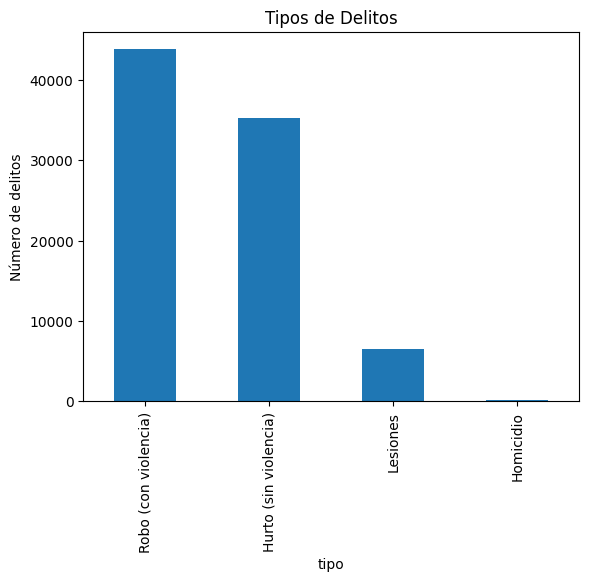

In [57]:
df.tipo.value_counts().plot(kind='bar')
plt.title("Tipos de Delitos")
plt.ylabel("Número de delitos")

Text(0, 0.5, 'Número de delitos por comuna')

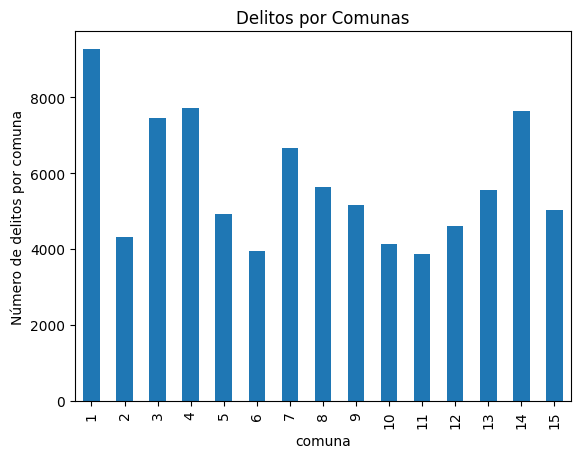

In [58]:
df.comuna.value_counts().sort_index().plot(kind='bar')
plt.title("Delitos por Comunas")
plt.ylabel("Número de delitos por comuna")

In [49]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-06-01 00:00:00+00:00,18,Homicidio,Siniestro Vial,NaN,Constitución,1,-34.627610,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-07-01 00:00:00+00:00,10,Homicidio,Siniestro Vial,NaN,Mataderos,9,-34.649730,-58.510590,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-10-01 00:00:00+00:00,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9,-34.647714,-58.468066,1.0


In [64]:
df.cantidad.value_counts()

cantidad
1.0     6031
2.0      566
3.0      110
4.0       36
5.0       19
6.0       11
7.0        6
10.0       1
9.0        1
Name: count, dtype: int64

In [61]:
df.cantidad.isnull().sum()

79120

In [ ]:
79120+6781

72339

In [50]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [51]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-06-01 00:00:00+00:00,18,Homicidio,Siniestro Vial,NaN,Constitución,1,-34.627610,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-07-01 00:00:00+00:00,10,Homicidio,Siniestro Vial,NaN,Mataderos,9,-34.649730,-58.510590,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-10-01 00:00:00+00:00,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9,-34.647714,-58.468066,1.0


In [52]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en Buenos Aires
mapa = folium.Map(location=[-34.6037, -58.3816], zoom_start=11)

# Agregar capa de calor con las ubicaciones del delito
heat_data = df[['latitud', 'longitud', 'cantidad']].dropna().values
HeatMap(heat_data, radius=10).add_to(mapa)

mapa
# Guardar y mostrar el mapa
#mapa.save("mapa_delitos.html")


In [53]:
df.groupby('barrio')['cantidad'].sum().sort_values(ascending=False)

barrio
Palermo              511.0
Balvanera            472.0
Flores               421.0
Caballito            329.0
Recoleta             310.0
Mataderos            299.0
Almagro              274.0
Villa Lugano         270.0
Belgrano             268.0
Villa Crespo         239.0
Saavedra             237.0
Monserrat            226.0
Nueva Pompeya        217.0
Barracas             214.0
Constitución         212.0
Villa Devoto         196.0
Liniers              192.0
Parque Avellaneda    180.0
Retiro               169.0
San Nicolás          167.0
Villa Urquiza        165.0
Boedo                165.0
San Cristóbal        158.0
Parque Chacabuco     146.0
Chacarita            131.0
Floresta             128.0
Parque Patricios     126.0
Nuñez                120.0
Villa Gral. Mitre     91.0
Boca                  89.0
Villa Del Parque      88.0
Villa Pueyrredón      88.0
Villa Santa Rita      85.0
Villa Luro            85.0
Villa Soldati         83.0
Vélez Sársfield       78.0
Monte Castro         

In [54]:
df.groupby('barrio')['cantidad'].sum().sum()

7859.0

In [55]:
df.head()

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-06-01 00:00:00+00:00,18,Homicidio,Siniestro Vial,NaN,Constitución,1,-34.627610,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-07-01 00:00:00+00:00,10,Homicidio,Siniestro Vial,NaN,Mataderos,9,-34.649730,-58.510590,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-10-01 00:00:00+00:00,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-11-01 00:00:00+00:00,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9,-34.647714,-58.468066,1.0
